In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests

## Ejemplo: mapa coroplético México

Lectura de datos, fijar índice y reproyección

In [2]:
mx = gpd.read_file('mapa_mexico/')\
        .set_index('CLAVE')\
        .to_crs(epsg=4485)
mx.head()

,NOM_MUN,NOMEDO,CVE_EDO,CVE_MUNI,Area,geometry
CLAVE,,,,,,
02004,Tijuana,Baja California,02,004,1122.661145,"POLYGON ((-73565.018 3602427.487, -73564.403 3..."
02003,Tecate,Baja California,02,003,3670.991923,"POLYGON ((-38995.078 3617846.589, -31557.921 3..."
02002,Mexicali,Baja California,02,002,13119.275713,"POLYGON ((48160.716 3621731.593, 58570.990 362..."
02005,Playas de Rosarito,Baja California,02,005,517.120801,"POLYGON ((-70946.724 3594803.753, -70966.034 3..."
26055,San Luis Rio Colorado,Sonora,26,055,9033.770278,"POLYGON ((127160.493 3587762.823, 127099.688 3..."


_El Índice de Complejidad Económica (ECI) mide las capacidades productivas de una localidad (e.g. estado o municipalidad) a partir de la presencia de actividades (e.g. empleo, industrias o exportaciones) en esa y otras localidades. La complejidad económica de una localidad predice su nivel de ingreso, crecimiento económico, desigualdad, y emisiones de gases de efecto invernadero._

In [3]:
url = 'https://api.datamexico.org/tesseract/cubes/complexity_eci/aggregate.jsonrecords?cuts%5B%5D=Latest.Latest.Latest.1&drilldowns%5B%5D=Geography+Municipality.Geography.Municipality&drilldowns%5B%5D=Date+Day.Date.Year&measures%5B%5D=ECI&parents=false&sparse=false'
data_eci = requests.get(url).json()
eci = pd.DataFrame(data_eci['data'])\
    .assign(CLAVE=lambda x: x['Municipality ID'].astype(str).str.zfill(5))\
    .set_index('CLAVE')

eci.head()

,Municipality ID,Municipality,Year,ECI
CLAVE,,,,
01001,1001,Aguascalientes,2022,2.895499
01002,1002,Asientos,2022,-0.383386
01003,1003,Calvillo,2022,0.234760
01004,1004,Cosío,2022,-0.523303
01005,1005,Jesús María,2022,2.983224


In [4]:
eci['ECI'].describe()

count    2.138000e+03
mean     6.271889e-10
std      1.000000e+00
min     -1.421483e+00
25%     -6.045471e-01
50%     -2.973396e-01
75%      2.057137e-01
max      5.301891e+00
Name: ECI, dtype: float64

<Axes: >

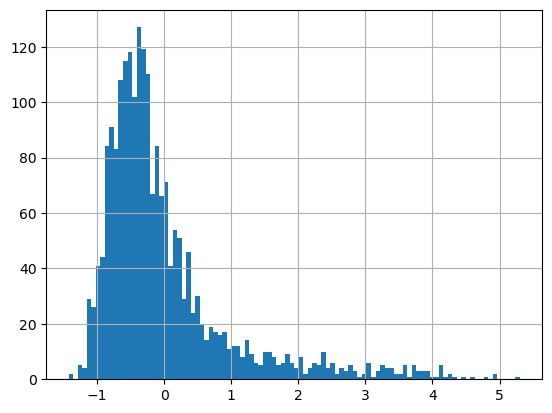

In [5]:
eci['ECI'].hist(bins=100)

In [6]:
mx = mx.join(eci, how='left')
mx.head()

,NOM_MUN,NOMEDO,CVE_EDO,CVE_MUNI,Area,geometry,Municipality ID,Municipality,Year,ECI
CLAVE,,,,,,,,,,
01001,Aguascalientes,Aguascalientes,01,001,1168.762384,"POLYGON ((1416489.577 2467700.472, 1417908.226...",1001.0,Aguascalientes,2022.0,2.895499
01002,Asientos,Aguascalientes,01,002,547.762077,"POLYGON ((1417043.958 2491681.240, 1417408.488...",1002.0,Asientos,2022.0,-0.383386
01003,Calvillo,Aguascalientes,01,003,931.300088,"POLYGON ((1347882.273 2454901.097, 1348002.307...",1003.0,Calvillo,2022.0,0.234760
01004,Cosio,Aguascalientes,01,004,128.907513,"POLYGON ((1397788.297 2509816.078, 1398009.089...",1004.0,Cosío,2022.0,-0.523303
01005,Jesus Maria,Aguascalientes,01,005,499.207990,"POLYGON ((1388272.165 2462097.533, 1389832.232...",1005.0,Jesús María,2022.0,2.983224


In [7]:
oax = mx.query('CVE_EDO=="20"')
edos = mx.dissolve(by='CVE_EDO')

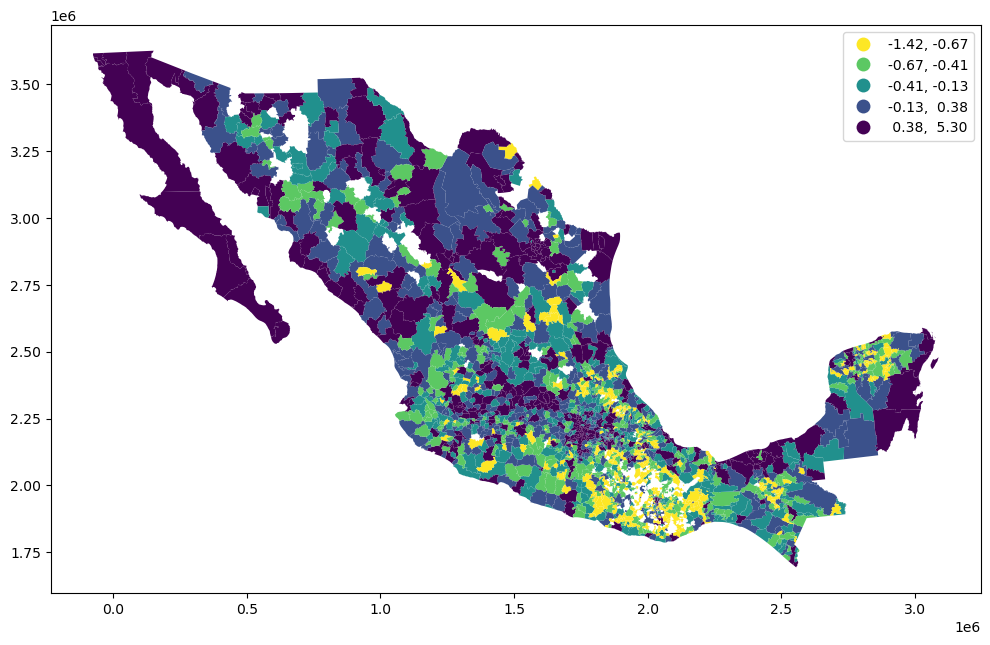

In [8]:
fig, ax = plt.subplots()
mx.plot(column='ECI', legend=True, scheme='quantiles', k=5, cmap='viridis_r', ax=ax)
fig.set_size_inches(12, 8)

Fuente: http://blog.jjsantoso.com/zoom-mapas-geopandas/